# EDA(Exploratory Data Analysis)

In [2]:
import numpy as np 
import pandas as pd 

In [4]:
data= pd.read_excel("superstore.xlsx")

In [6]:
data.head(4)

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,...,Central,Illinois,Addison,60101,2012-05-28,2012-05-30,1.32,2,5.90,88525
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2010-07-07,2010-07-08,4.56,4,13.01,88522
2,23086,Not Specified,0.03,6.68,6.15,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-47.64,7,49.92,88523
3,23087,Not Specified,0.01,5.68,3.60,3,Bonnie Potter,Regular Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-30.51,7,41.64,88523


In [8]:
data.shape

(9426, 24)

In [10]:
data.isnull().sum()

Row ID                   0
Order Priority           0
Discount                 0
Unit Price               0
Shipping Cost            0
Customer ID              0
Customer Name            0
Ship Mode                0
Customer Segment         0
Product Category         0
Product Sub-Category     0
Product Container        0
Product Name             0
Product Base Margin     72
Region                   0
State or Province        0
City                     0
Postal Code              0
Order Date               0
Ship Date                0
Profit                   0
Quantity ordered new     0
Sales                    0
Order ID                 0
dtype: int64

In [13]:
data["Product Base Margin"].fillna(data["Product Base Margin"].mean(), inplace= True)

In [15]:
data.isnull().sum()

Row ID                  0
Order Priority          0
Discount                0
Unit Price              0
Shipping Cost           0
Customer ID             0
Customer Name           0
Ship Mode               0
Customer Segment        0
Product Category        0
Product Sub-Category    0
Product Container       0
Product Name            0
Product Base Margin     0
Region                  0
State or Province       0
City                    0
Postal Code             0
Order Date              0
Ship Date               0
Profit                  0
Quantity ordered new    0
Sales                   0
Order ID                0
dtype: int64

In [17]:
data["Order Priority"].value_counts()

High             1970
Low              1926
Not Specified    1881
Medium           1844
Critical         1804
Critical            1
Name: Order Priority, dtype: int64

In [19]:
data["Order Priority"].unique()

array(['Not Specified', 'High', 'Medium', 'Low', 'Critical', 'Critical '],
      dtype=object)

In [21]:
# data cleaning 
data["Order Priority"]= data["Order Priority"].replace("Critical ", "Critical")

In [23]:
data["Order Priority"].unique()

array(['Not Specified', 'High', 'Medium', 'Low', 'Critical'], dtype=object)

In [25]:
# Grapgical analysis
# Univariate analysis

import matplotlib.pyplot as plt
import seaborn as sns

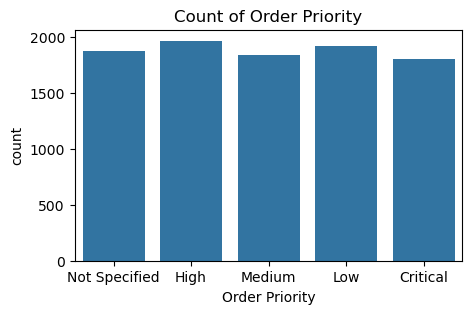

In [27]:
# order priority 

plt.figure(figsize=(5,3))
sns.countplot(data= data, x="Order Priority")
plt.title("Count of Order Priority")
plt.show()

In [29]:
data["Ship Mode"].value_counts()

Regular Air       7036
Delivery Truck    1283
Express Air       1107
Name: Ship Mode, dtype: int64

In [31]:
data["Ship Mode"].value_counts().index

Index(['Regular Air', 'Delivery Truck', 'Express Air'], dtype='object')

In [33]:
x= data["Ship Mode"].value_counts().index
y= data["Ship Mode"].value_counts().values

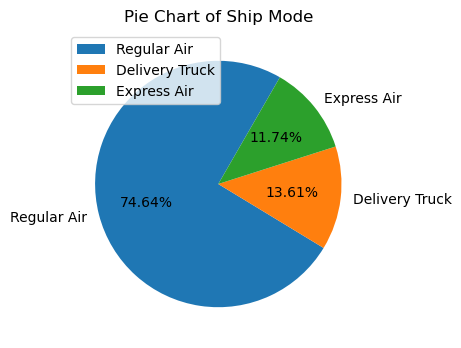

In [35]:
# Ship Mode
plt.figure(figsize=(5, 4))
plt.pie(y, labels= x, startangle= 60, autopct= "%0.2f%%")
plt.legend(loc= 2)
plt.title("Pie Chart of Ship Mode")
plt.show()

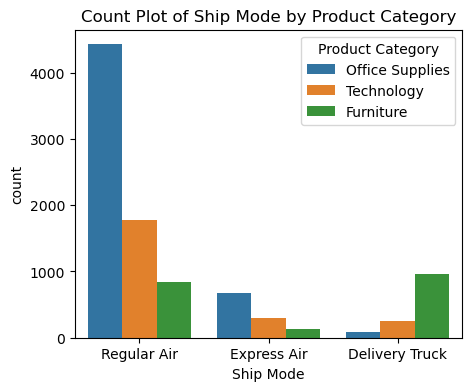

In [37]:
# Bivariate analysis

plt.figure(figsize=(5, 4))
sns.countplot(data= data, x="Ship Mode", hue="Product Category")
plt.title("Count Plot of Ship Mode by Product Category")
plt.show()

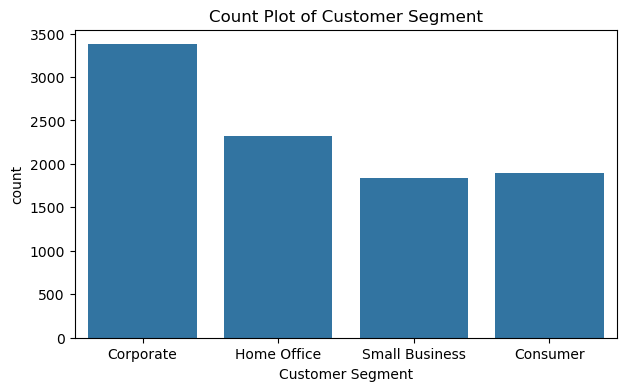

In [39]:
plt.figure(figsize=(7, 4))
sns.countplot(data= data, x="Customer Segment")
plt.title("Count Plot of Customer Segment")
plt.show()

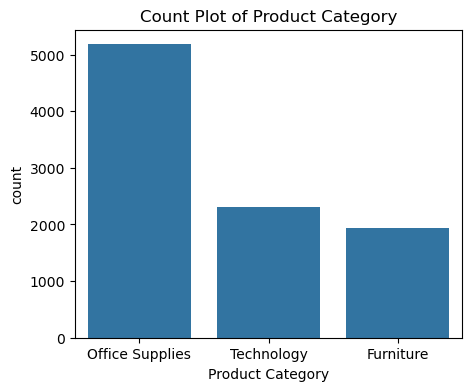

In [41]:
plt.figure(figsize=(5, 4))
sns.countplot(data= data, x="Product Category")
plt.title("Count Plot of Product Category")
plt.show()

In [43]:
data["Order Year"]= data["Order Date"].dt.year

In [45]:
data["Order Year"].value_counts()

2013    3054
2012    2241
2011    2179
2010    1952
Name: Order Year, dtype: int64

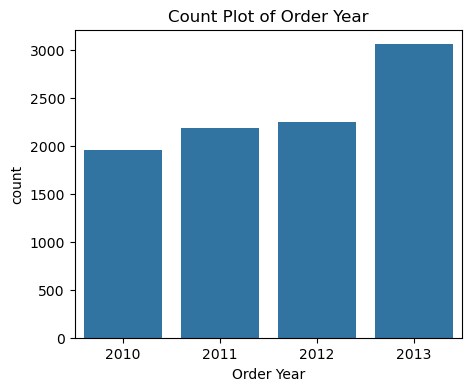

In [47]:
plt.figure(figsize=(5, 4))
sns.countplot(data= data, x="Order Year")
plt.title("Count Plot of Order Year") 
plt.show()

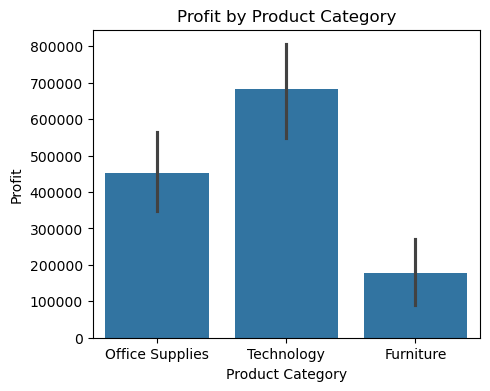

In [49]:
plt.figure(figsize=(5, 4))
sns.barplot(data= data, x="Product Category", y="Profit", estimator= "sum")
plt.title("Profit by Product Category") 
plt.show()

In [51]:
# sales by state
data["State or Province"].value_counts()[:5]

California    1021
Texas          646
Illinois       584
New York       574
Florida        522
Name: State or Province, dtype: int64

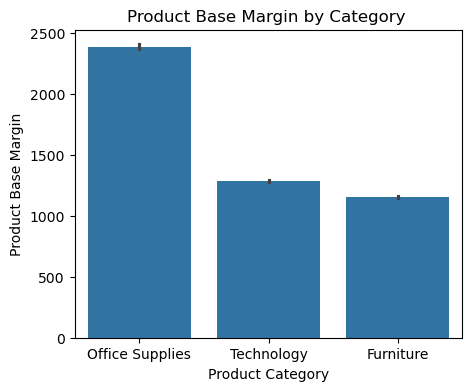

In [53]:
plt.figure(figsize=(5, 4))
sns.barplot(data= data, x="Product Category", y="Product Base Margin", estimator= "sum")
plt.title("Product Base Margin by Category ")
plt.show()